In [22]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from IPython.display import display 
from PIL import Image, ImageOps

In [8]:
# Load the file names and their respective target labels into numpy arrays! 

from sklearn.datasets import load_files       #Load text files with categories as subfolder names
import numpy as np

train_dir = "D:/Ronit/Data Science/Projects/Deep Learning - Image Recognition/Data/fruits-360/Training"
test_dir = "D:/Ronit/Data Science/Projects/Deep Learning - Image Recognition/Data/fruits-360/Test"

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)
print('Loading complete!')

print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

Loading complete!
Training set size :  67692
Testing set size :  22688


In [9]:
# Target labels are numbers corresponding to class label. Converting them to a vector of 114 elements

from keras.utils import np_utils
no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Dividing the Validation set into Test and Validation set

x_test,x_valid = x_test[7000:],x_test[:7000]
y_test,y_vaild = y_test[7000:],y_test[:7000]
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',y_vaild.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 131)
Test X :  (15688,)
Test y :  (15688, 131)


In [11]:
# Converting the images into numeric data

from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training set shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training set shape :  (67692, 100, 100, 3)
Validation set shape :  (7000, 100, 100, 3)
Test set shape :  (15688, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [12]:
x_train[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
# Rescaling the pixel values within 0 and 1

x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

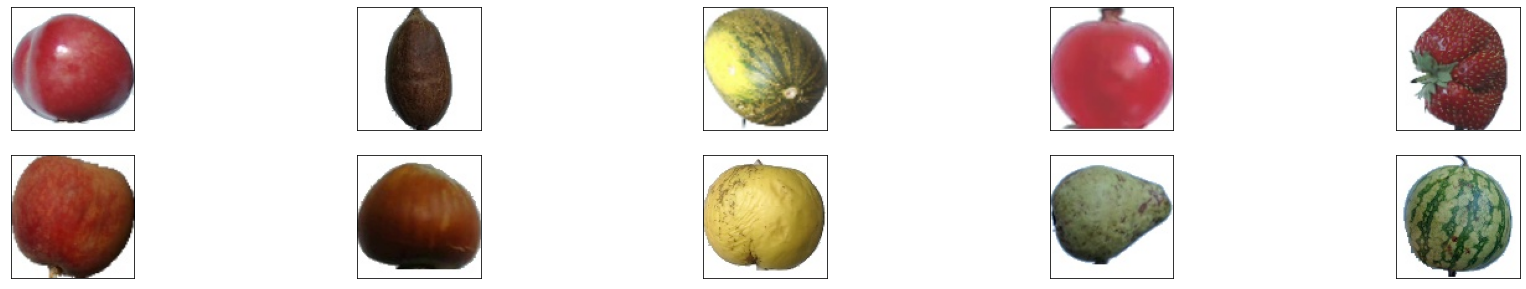

In [14]:
#Visualizing the first 10 training images

import matplotlib.pyplot as plt

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i])) 

In [15]:
# Building a CNN

img_row = 100
img_col = 100

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation = "relu", input_shape = (img_row, img_col, 3), padding = "same"))
model.add(MaxPool2D(2))
model.add(Dropout(0.1))

model.add(Conv2D(32, kernel_size=3, activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dense(131, activation = "softmax"))

In [16]:
# Compiling the model

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [17]:
# Creating a checkpoint to store the best parameters

batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'cnn_fruits.hdf5', verbose = 1, save_best_only = True)

history = model.fit(x_train,y_train, 
                    
        batch_size = 1024, epochs=3, validation_data=(x_valid, y_vaild), callbacks = [checkpointer], verbose=1, shuffle=True)

Epoch 1/3
67/67 [==============================] - 377s 6s/step - loss: 3.1231 - accuracy: 0.3290 - val_loss: 0.8664 - val_accuracy: 0.7619

Epoch 00001: val_loss improved from inf to 0.86642, saving model to cnn_fruits.hdf5
Epoch 2/3
67/67 [==============================] - 376s 6s/step - loss: 0.1772 - accuracy: 0.9548 - val_loss: 0.4492 - val_accuracy: 0.8787

Epoch 00002: val_loss improved from 0.86642 to 0.44925, saving model to cnn_fruits.hdf5
Epoch 3/3
67/67 [==============================] - 375s 6s/step - loss: 0.0450 - accuracy: 0.9908 - val_loss: 0.3013 - val_accuracy: 0.9247

Epoch 00003: val_loss improved from 0.44925 to 0.30129, saving model to cnn_fruits.hdf5


# The Accuracy of the model is 99.64% on the training set and 93% on the Validation set.

In [18]:
# Loading the best weights 

model.load_weights('cnn_fruits.hdf5')

In [19]:
# Predicting

y_pred = model.predict(x_test)


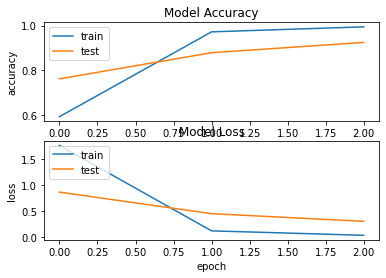

In [20]:
# Visualizing the Loss and Accuracy against Epochs

import matplotlib.pyplot as plt 
plt.figure(1)    
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

# The End!

In [23]:
st.write("Fruits and Vegetables Classification")
file = st.file_uploader("Please upload an image", type=["jpg", "png"])
def import_and_predict(image_data, model):
    
        size = (100,100)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_reshape = img[np.newaxis,...]
        prediction = model.predict(img_reshape)
        return prediction
        
        
        
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(targer_labels[np.argmax(score)], 100 * np.max(score))
)

2021-09-09 11:27:08.856 
  command:

    streamlit run C:\Users\ronit\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [29]:
!ngrok authtoken 1xthih8xHfQ4Zx3D0sCy03bbB7T_7GRYUNMPw9JRS7p2QFcaD

Authtoken saved to configuration file: C:\Users\ronit/.ngrok2/ngrok.yml


In [32]:

# streamlit run C:\Users\ronit\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel_launcher.py 

SyntaxError: invalid syntax (<ipython-input-32-dd0fc9635d4c>, line 1)

In [34]:
from pyngrok import ngrok
url=ngrok.connect(port=8500)
url

2021-09-09 11:52:48.362 Opening tunnel named: http-80-76aee524-5872-4fbf-8ebe-c91bf2959f88
2021-09-09 11:52:48.372 t=2021-09-09T11:52:48+0200 lvl=info msg=start pg=/api/tunnels id=8a898246b6000c36
2021-09-09 11:52:48.790 t=2021-09-09T11:52:48+0200 lvl=info msg="started tunnel" obj=tunnels name="http-80-76aee524-5872-4fbf-8ebe-c91bf2959f88 (http)" addr=http://localhost:80 url=http://acfc-77-64-150-21.ngrok.io
2021-09-09 11:52:48.793 t=2021-09-09T11:52:48+0200 lvl=info msg="started tunnel" obj=tunnels name=http-80-76aee524-5872-4fbf-8ebe-c91bf2959f88 addr=http://localhost:80 url=https://acfc-77-64-150-21.ngrok.io
2021-09-09 11:52:48.794 t=2021-09-09T11:52:48+0200 lvl=info msg=end pg=/api/tunnels id=8a898246b6000c36 status=201 dur=418.1319ms
2021-09-09 11:52:48.795 t=2021-09-09T11:52:48+0200 lvl=info msg=start pg="/api/tunnels/http-80-76aee524-5872-4fbf-8ebe-c91bf2959f88 (http)" id=e09b8aadf835fd58
2021-09-09 11:52:48.795 t=2021-09-09T11:52:48+0200 lvl=info msg=end pg="/api/tunnels/http-8

<NgrokTunnel: "http://acfc-77-64-150-21.ngrok.io" -> "http://localhost:80">

2021-09-09 11:53:26.847 t=2021-09-09T11:53:26+0200 lvl=warn msg="failed to open private leg" id=036893ecc3f7 privaddr=localhost:80 err="dial tcp [::1]:80: connectex: No connection could be made because the target machine actively refused it."
2021-09-09 11:53:29.863 t=2021-09-09T11:53:29+0200 lvl=warn msg="failed to open private leg" id=5975425c9bc5 privaddr=localhost:80 err="dial tcp [::1]:80: connectex: No connection could be made because the target machine actively refused it."
2021-09-09 12:40:12.078 t=2021-09-09T12:40:12+0200 lvl=eror msg="heartbeat timeout, terminating session" obj=csess id=58f458976c76 clientid=a6ed455a787235efe7d38107420b26c0
2021-09-09 12:40:12.082 t=2021-09-09T12:40:12+0200 lvl=eror msg="session closed, starting reconnect loop" obj=csess id=d0475d739b0c err="session closed"
2021-09-09 12:40:12.119 t=2021-09-09T12:40:12+0200 lvl=eror msg="failed to reconnect session" obj=csess id=d0475d739b0c err="dial tcp: lookup tunnel.us.ngrok.com: no such host"
2021-09-09 